In [1]:
import pandas as pd
import pandas_profiling

In [44]:
df = pd.read_csv("ai4i2020.csv")

In [20]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [16]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [21]:
df[df['Machine failure']==1]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


In [26]:
temp =df.profile_report()
temp.to_widgets()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
"""
From the observation itself we can analyse:
    1. There are no missing values
    2. Air temperature is correlated with process temp , TWF , HDF , PWF , OSF , RNF
    3. no missing values in the dataset.
    4. machine failure is highly correlated with TWF , HDF , PWF , OSF , RNF so we will also
        drop machine failure because it is creating Multicollinearity 
    5.Rotational speed [rpm] and Torque [Nm] are creating Multicollinearity so we will drop one of
        them.

"""

'\nFrom the observation itself we can analyse:\n    1. There are no missing values\n    2. Air temperature is correlated with process temp , TWF , HDF , PWF , OSF , RNF\n    3. no missing values in the dataset\n    4. machine failure is highly correlated with TWF , HDF , PWF , OSF , RNF so we will also\n        drop it \n    5.\n\n'

In [45]:
df.drop(['UDI', 'Product ID', 'Type','Machine failure' ] , axis=1,inplace=True)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

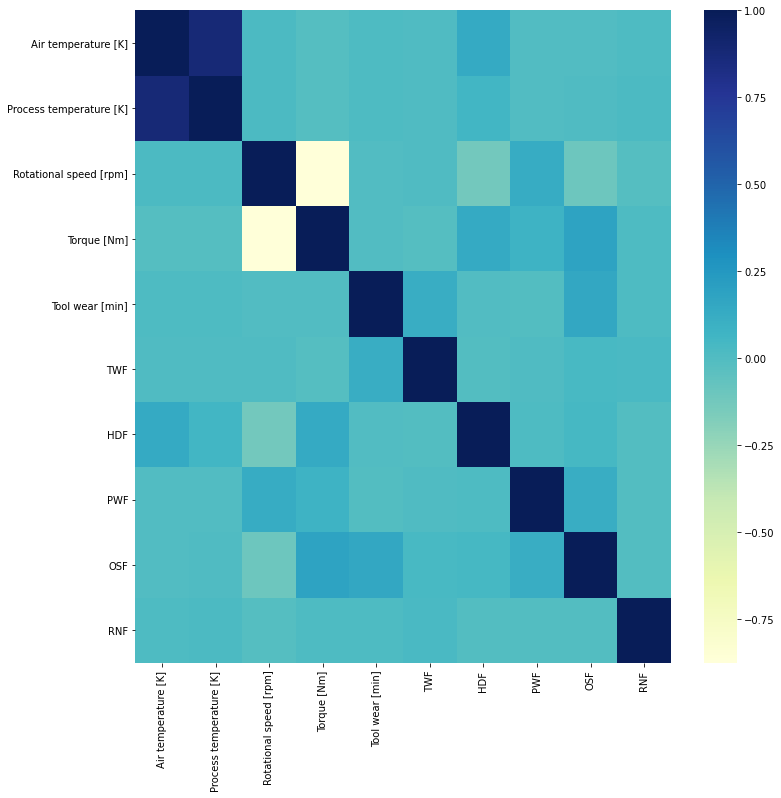

In [46]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr() , cmap="YlGnBu")

In [49]:
df.drop('Rotational speed [rpm]', axis=1 ,inplace= True)

<AxesSubplot:>

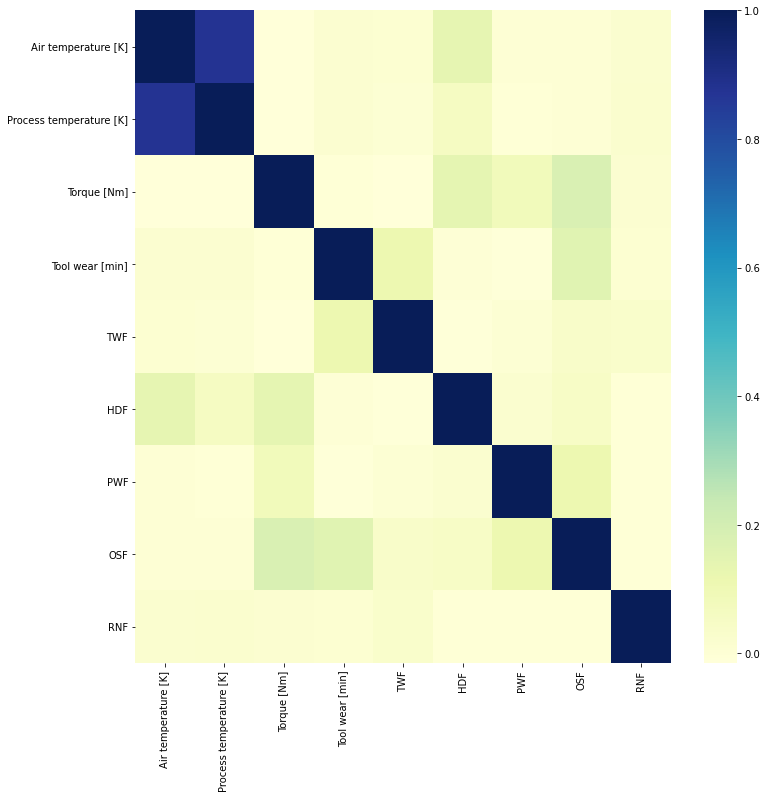

In [50]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr() , cmap="YlGnBu")

In [51]:
df.head()

,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,298.1,308.6,42.8,0,0,0,0,0,0
1,298.2,308.7,46.3,3,0,0,0,0,0
2,298.1,308.5,49.4,5,0,0,0,0,0
3,298.2,308.6,39.5,7,0,0,0,0,0
4,298.2,308.7,40.0,9,0,0,0,0,0


In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression()

In [54]:
y = df['Air temperature [K]']

In [55]:
y

0       298.1
1       298.2
2       298.1
3       298.2
4       298.2
        ...  
9995    298.8
9996    298.9
9997    299.0
9998    299.0
9999    299.0
Name: Air temperature [K], Length: 10000, dtype: float64

In [61]:
x = df.drop('Air temperature [K]' , axis=1)

In [81]:
df

,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,298.1,308.6,42.8,0,0,0,0,0,0
1,298.2,308.7,46.3,3,0,0,0,0,0
2,298.1,308.5,49.4,5,0,0,0,0,0
3,298.2,308.6,39.5,7,0,0,0,0,0
4,298.2,308.7,40.0,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,29.5,14,0,0,0,0,0
9996,298.9,308.4,31.8,17,0,0,0,0,0
9997,299.0,308.6,33.4,22,0,0,0,0,0
9998,299.0,308.7,48.5,25,0,0,0,0,0


In [63]:
model.fit(x,y)

LinearRegression()

In [68]:
import pickle

In [69]:
pickle.dump(model, open('model.pkl', 'wb'))

In [72]:
pickled_model = pickle.load(open('model.pkl', 'rb'))


In [73]:
pickled_model.predict([[308.6,42.8,0,0,0,0,0,0]])


array([298.31811819])

In [85]:
test_cases=[[308.6,42.8,0,0,0,0,0,0],
            [308.5,48.8,0,0,0,0,0,0],
            [308.7,40.8,0,0,0,0,0,0],
            [308.7,40.2,0,0,0,0,0,0],
            [308.6,42.8,0,0,0,0,0,0],
            [308.5,42.8,0,0,0,0,0,0],
            [308.5,42.8,0,0,0,0,0,0],
            [308.7,33.0,0,0,0,0,0,0]]

In [88]:
for i in test_cases:
    print(pickled_model.predict([i]))

[298.31811819]
[298.18389806]
[298.44111889]
[298.4428018]
[298.31811819]
[298.20072723]
[298.20072723]
[298.4629968]


In [ ]:
#done